In [1]:
import json
from keras.models import load_model
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences

import collections
from keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

from tensorflow.keras.preprocessing.image import load_img, img_to_array

from keras.models import Model

In [2]:
# Read the files word_to_idx.pkl and idx_to_word.pkl to get the mappings between word and index
word_to_index = {}
with open ("data/textFiles/word_to_idx.pkl", 'rb') as file:
    word_to_index = pd.read_pickle(file)

index_to_word = {}
with open ("data/textFiles/idx_to_word.pkl", 'rb') as file:
    index_to_word = pd.read_pickle(file)


In [3]:
print("Loading the model...")
model = load_model('model_checkpoints/model_19.h5')

resnet50_model = ResNet50 (weights = 'imagenet', input_shape = (224, 224, 3))
resnet50_model = Model (resnet50_model.input, resnet50_model.layers[-2].output)


Loading the model...


In [4]:
# Generate Captions for a random image in test dataset
def predict_caption(photo):

    inp_text = "startseq"

    for i in range(38):
        sequence = [word_to_index[w] for w in inp_text.split() if w in word_to_index]
        sequence = pad_sequences([sequence], maxlen=38, padding='post')

        ypred = model.predict([photo, sequence])
        ypred = ypred.argmax()
        word = index_to_word[ypred]

        inp_text += (' ' + word)

        if word == 'endseq':
            break

    final_caption = inp_text.split()[1:-1]
    final_caption = ' '.join(final_caption)
    return final_caption

In [5]:
def preprocess_image (img):
    img = load_img(img, target_size=(224, 224))
    img = img_to_array(img)

    # Convert 3D tensor to a 4D tendor
    img = np.expand_dims(img, axis=0)

    #Normalize image accoring to ResNet50 requirement
    img = preprocess_input(img)

    return img

In [6]:
# A wrapper function, which inputs an image and returns its encoding (feature vector)
def encode_image (img):
    img = preprocess_image(img)

    feature_vector = resnet50_model.predict(img)
    # feature_vector = feature_vector.reshape((-1,))
    return feature_vector

Encoding the image ...
1/1 [==============================] - 0s 99ms/step
Running model to generate the caption...
1/1 [==============================] - 0s 21ms/step
a dog swims through water


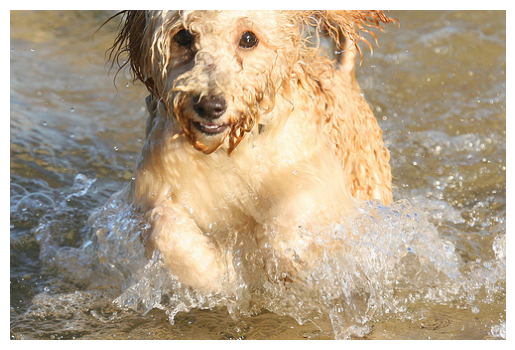

In [16]:
print("Encoding the image ...")
img_name = "input1.jpg"
photo = encode_image(img_name).reshape((1, 2048))

print("Running model to generate the caption...")
caption = predict_caption(photo)
print(caption)
img_data = plt.imread(img_name)
plt.imshow(img_data)
plt.axis("off")

plt.show()